📊 04_results_visualization.ipynb

In [1]:
#1 Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#2 Load model results
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/projects/fsgs/notebooks/fsgs_dataset_preprocessed.csv')

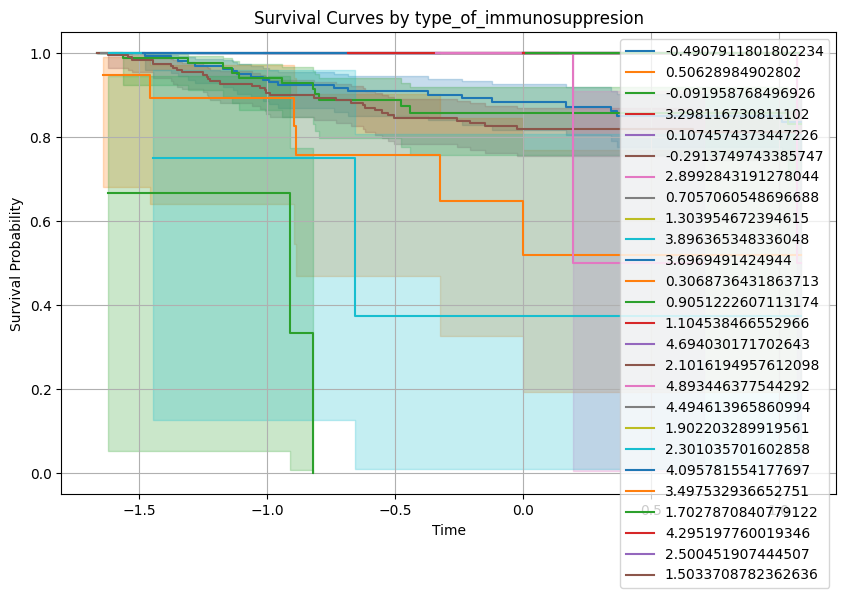

In [10]:
#3 Kaplan-Meier again for stratified groups
!pip install lifelines
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

group_col = 'type_of_immunosuppresion'
groups = df[group_col].unique()
T = df['_t']  # Changed from 'survival_time' to '_t'
E = df['_d']  # Changed from 'event_occurred' to '_d'

plt.figure(figsize=(10,6))
for group in groups:
    ix = df[group_col] == group
    kmf = KaplanMeierFitter()
    kmf.fit(T[ix], event_observed=E[ix], label=str(group))
    kmf.plot_survival_function()

plt.title(f'Survival Curves by {group_col}')
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.legend()
plt.grid(True)
plt.show()